# Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import seaborn as sns
import math
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
datafile = "DocklessTripOpenData_1.csv"
df = pd.read_csv(datafile)

In [3]:
#df=pd.read_csv("https://data.louisvilleky.gov/sites/default/files/DocklessTripOpenData_1.csv")

In [4]:
df[:2]

TripID   StartDate StartTime     EndDate EndTime  \
0  00017244-16f8-0be0-5a68-3e860236  2018-10-23     17:45  2018-10-23   17:45   
1  000340a5-ee7c-7b45-9bab-8271ad86  2019-04-16     13:15  2019-04-16   13:30   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0           4.0          0.31         38.257         -85.759       38.254   
1          13.0          2.15         38.253         -85.740       38.229   

   EndLongitude  DayOfWeek  HourNum  
0       -85.758          3       17  
1       -85.741          3       13

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134209 entries, 0 to 134208
Data columns (total 13 columns):
TripID            134209 non-null object
StartDate         134209 non-null object
StartTime         134209 non-null object
EndDate           134209 non-null object
EndTime           134209 non-null object
TripDuration      134209 non-null float64
TripDistance      134209 non-null float64
StartLatitude     134209 non-null float64
StartLongitude    134209 non-null float64
EndLatitude       134209 non-null float64
EndLongitude      134209 non-null float64
DayOfWeek         134209 non-null int64
HourNum           134209 non-null int64
dtypes: float64(6), int64(2), object(5)
memory usage: 13.3+ MB


In [6]:
df=df.replace({'HourNum': {0: 24}})

# Initial Analysis

In [7]:
avg_ride_time=df['TripDuration'].mean()
print("average time of ride (minutes):",avg_ride_time)

average time of ride (minutes): 14.853698336177157


In [8]:
avg_trip_distance=df['TripDistance'].mean()
print("average trip distance (miles):",avg_trip_distance)

average trip distance (miles): 1.1740976387572928


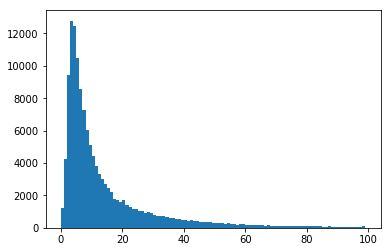

In [9]:
#TripDuration
plt.hist(df['TripDuration'], bins = np.arange(0, 100, 1))
plt.show()

Day of week count 7
7    23166
6    20356
5    19832
4    18986
3    18325
1    17674
2    15870
Name: DayOfWeek, dtype: int64


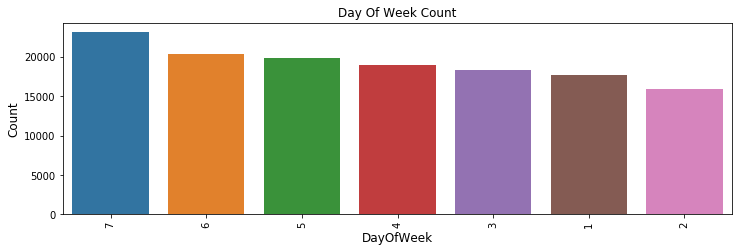

In [10]:
#DayOfWeek
DayOfWeek= df['DayOfWeek'].value_counts()
print("Day of week count " + str(len(DayOfWeek)))
print(DayOfWeek)
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(DayOfWeek.index, DayOfWeek.values, order = DayOfWeek.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('DayOfWeek', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Day Of Week Count", fontsize=12)
plt.show()

time of day count 7
13    11746
14    11695
15    11471
12    11412
16    10679
11     9993
17     9674
10     8088
18     7941
9      7186
19     6964
8      6002
20     5441
7      4251
6      3157
5      2209
21     1669
4      1260
22      934
23      713
3       707
2       380
24      345
1       292
Name: HourNum, dtype: int64


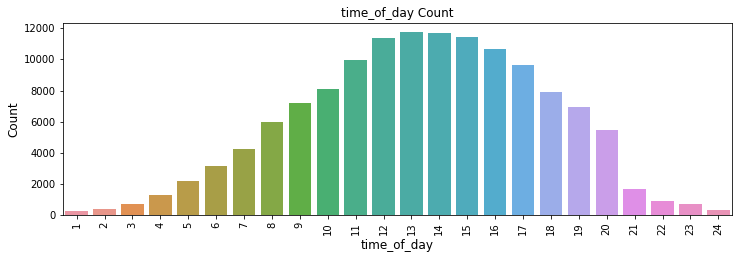

In [11]:
#time_of_day
time_of_day= df['HourNum'].value_counts()
print("time of day count " + str(len(DayOfWeek)))
print(time_of_day)
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(time_of_day.index, time_of_day.values)
plt.ylabel('Count', fontsize=12)
plt.xlabel('time_of_day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("time_of_day Count", fontsize=12)
plt.show()

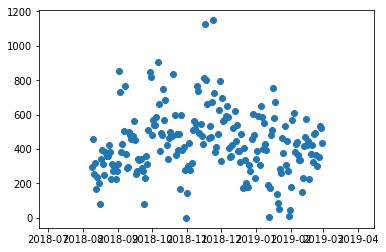

In [12]:
df2 = pd.read_csv("https://data.louisvilleky.gov/sites/default/files/DocklessTripOpenData_1.csv",parse_dates=['StartDate'],index_col='StartDate')
df2['count'] = 1
bikes_daily = df2.resample('D')
bikes_hourly = df2.resample('H')
bikes_daily_mean = df2.resample('D').mean()
bikes_daily_sum = df2.resample('D').sum()
plt.scatter(bikes_daily_sum.index,bikes_daily_sum['count'])

## Finding Geographical Bounds

In [13]:
df['StartLatitude'].max()

38.34

In [14]:
df['StartLatitude'].min()

38.089

In [15]:
df['StartLongitude'].max()

-85.486

In [16]:
df['StartLongitude'].min()

-85.90299999999999

In [17]:
df['EndLatitude'].max()

48.864

In [18]:
df['EndLatitude'].min()

-85.757

In [19]:
df['EndLongitude'].max()

6.832999999999999

In [20]:
df['EndLongitude'].min()

-122.415

In [21]:
df.describe()

TripDuration   TripDistance  StartLatitude  StartLongitude  \
count  134209.000000  134209.000000  134209.000000   134209.000000   
mean       14.853698       1.174098      38.238338      -85.749792   
std        24.477723       1.888077       0.017524        0.017569   
min         0.000000      -1.000000      38.089000      -85.903000   
25%         4.000000       0.290000      38.221000      -85.760000   
50%         8.000000       0.660000      38.244000      -85.756000   
75%        17.000000       1.440000      38.255000      -85.745000   
max      3167.000000     100.000000      38.340000      -85.486000   

         EndLatitude   EndLongitude      DayOfWeek        HourNum  
count  134209.000000  134209.000000  134209.000000  134209.000000  
mean       38.236854     -85.748730       4.200843      13.386278  
std         0.350929       0.545829       2.015541       4.227821  
min       -85.757000    -122.415000       1.000000       1.000000  
25%        38.220000     -85.760000       3.000000      11.000000  
50%        38.242000     -85.756000       4.000000      14.000000  
75%        38.254000     -85.744000       6.000000      17.000000  
max        48.864000       6.833000       7.000000      24.000000

# Splitting Into Zones

In [22]:
data= pd.read_csv(datafile)

In [23]:
'''
P = np.percentile(data['EndLatitude'], [0.01, 99.99])
datanew = data[(data['EndLatitude']> P[0]) & (data['EndLatitude'] < P[1])]
datanew.describe()
'''
LatitudeRange = np.percentile(data['EndLatitude'], [1, 99])
LongitudeRange=np.percentile(data['StartLongitude'], [1, 99])
datanew = data[(data['EndLatitude']> LatitudeRange[0]) & (data['EndLatitude'] < LatitudeRange[1]) 
               &(data['StartLatitude']> LatitudeRange[0]) &  (data['EndLatitude'] < LatitudeRange[1])
               &(data['StartLongitude']> LongitudeRange[0]) &  (data['StartLongitude'] < LongitudeRange[1])
               &(data['EndLongitude']> LongitudeRange[0]) &  (data['EndLongitude'] < LongitudeRange[1])]
datanew.describe()

TripDuration   TripDistance  StartLatitude  StartLongitude  \
count  127162.000000  127162.000000  127162.000000   127162.000000   
mean       14.368436       1.113408      38.238591      -85.750353   
std        24.006760       1.829692       0.016984        0.015317   
min         0.000000      -1.000000      38.203000      -85.769000   
25%         4.000000       0.280000      38.221000      -85.760000   
50%         7.000000       0.630000      38.244000      -85.756000   
75%        16.000000       1.350000      38.255000      -85.746000   
max      3167.000000     100.000000      38.290000      -85.694000   

         EndLatitude   EndLongitude      DayOfWeek       HourNum  
count  127162.000000  127162.000000  127162.000000  127162.00000  
mean       38.238320     -85.750016       4.200272      13.29582  
std         0.017146       0.015429       2.012228       4.24086  
min        38.203000     -85.769000       1.000000       0.00000  
25%        38.220000     -85.760000       3.000000      10.00000  
50%        38.243000     -85.756000       4.000000      13.00000  
75%        38.254000     -85.745000       6.000000      16.00000  
max        38.262000     -85.694000       7.000000      24.00000

In [24]:
(85.694000-85.769000)/4

-0.01875000000000071

In [25]:
(38.290000-38.203000)/4

0.021749999999999048

In [26]:
def area(Latitude,longtitude):
    #Latitude Start min=38.08  max=38.34
    #Longitude Start min=-85.9  max=-85.49
    latitude_value=(Latitude-38.2030000)/0.021749999999999048
    latitude_area=round(latitude_value)
    Longitude_value=(longtitude+85.769000)/0.01876000000000071
    Longitude_area=math.floor(Longitude_value)
    final_area=(Longitude_area)*4+latitude_area+1
    return final_area
def latitude_area(Latitude,longtitude):
    #Latitude Start min=38.08  max=38.34
    #Longitude Start min=-85.9  max=-85.49
    latitude_value=(Latitude-38.203000)/0.00869999999999962
    latitude_area=round(latitude_value)
    Longitude_value=(longtitude+85.769000)/0.007500000000000284
    Longitude_area=round(Longitude_value)
    final_area=latitude_area*10+Longitude_area
    return latitude_area
def Longitude_area(Latitude,longtitude):
    #Latitude Start min=38.08  max=38.34
    #Longitude Start min=-85.9  max=-85.49
    latitude_value=(Latitude-38.203000)/0.00869999999999962
    latitude_area=round(latitude_value)
    Longitude_value=(longtitude+85.769000)/0.007500000000000284
    Longitude_area=round(Longitude_value)
    final_area=latitude_area*10+Longitude_area
    return Longitude_area

In [27]:
area(38.290000,-85.694000)

17

In [28]:
datanew['StartArea'] =datanew.apply(lambda row: area(row['StartLatitude'],row['StartLongitude']), axis=1)
datanew['EndArea'] = datanew.apply(lambda row: area(row['EndLatitude'],row['EndLongitude']), axis=1)
'''
datanew['Startlatitude_area'] =datanew.apply(lambda row: latitude_area(row['StartLatitude'],row['StartLongitude']), axis=1)
datanew['Endlatitude_area'] = datanew.apply(lambda row: latitude_area(row['EndLatitude'],row['EndLongitude']), axis=1)
datanew['StartLongitude_area'] =datanew.apply(lambda row: Longitude_area(row['StartLatitude'],row['StartLongitude']), axis=1)
datanew['EndLongitude_area'] = datanew.apply(lambda row: Longitude_area(row['EndLatitude'],row['EndLongitude']), axis=1)
'''

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


"\ndatanew['Startlatitude_area'] =datanew.apply(lambda row: latitude_area(row['StartLatitude'],row['StartLongitude']), axis=1)\ndatanew['Endlatitude_area'] = datanew.apply(lambda row: latitude_area(row['EndLatitude'],row['EndLongitude']), axis=1)\ndatanew['StartLongitude_area'] =datanew.apply(lambda row: Longitude_area(row['StartLatitude'],row['StartLongitude']), axis=1)\ndatanew['EndLongitude_area'] = datanew.apply(lambda row: Longitude_area(row['EndLatitude'],row['EndLongitude']), axis=1)\n"

In [29]:
datanew.head()

TripID   StartDate StartTime     EndDate EndTime  \
0  00017244-16f8-0be0-5a68-3e860236  2018-10-23     17:45  2018-10-23   17:45   
1  000340a5-ee7c-7b45-9bab-8271ad86  2019-04-16     13:15  2019-04-16   13:30   
2  000391b9-1d9c-5473-f20e-b58b3138  2019-01-28     17:45  2019-01-28   18:15   
3  000401e5-e298-4b7c-2434-8748939b  2018-12-21     14:30  2018-12-21   14:45   
4  00041db3-81c6-7f93-9a15-c0e9d767  2019-02-10     10:30  2019-02-10   10:30   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0           4.0          0.31         38.257         -85.759       38.254   
1          13.0          2.15         38.253         -85.740       38.229   
2          30.0          2.55         38.258         -85.756       38.254   
3           6.0          0.31         38.253         -85.758       38.253   
4           1.0          0.01         38.257         -85.762       38.257   

   EndLongitude  DayOfWeek  HourNum  StartArea  EndArea  
0       -85.758          3       17          3        3  
1       -85.741          3       13          7        6  
2       -85.753          2       17          4        3  
3       -85.759          6       14          3        3  
4       -85.763          1       10          3        3

In [30]:
datanew.StartArea.unique()

array([ 3,  7,  4,  1,  8,  2, 11, 14, 15,  5, 10,  6, 12, 16,  9, 13])

## Starting and Ending Zone Counts

StartArea count 16
3     41509
2     39195
7     16045
11     9370
1      5872
14     4472
4      2378
8      2296
6      2240
10     1257
15     1153
5       857
12      337
16      102
9        69
13       10
Name: StartArea, dtype: int64


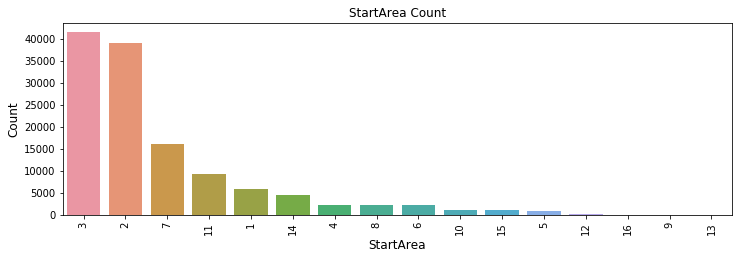

In [31]:
#DayOfWeek
StartArea= datanew['StartArea'].value_counts()
print("StartArea count " + str(len(StartArea)))
print(StartArea)
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(StartArea.index, StartArea.values, order = StartArea.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('StartArea', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("StartArea Count", fontsize=12)
plt.show()

EndArea count 16
3     39533
2     37283
7     16735
11     9071
1      6962
14     4403
8      2993
4      2860
6      2831
10     1449
15     1339
5      1147
12      293
16      153
9        96
13       14
Name: EndArea, dtype: int64


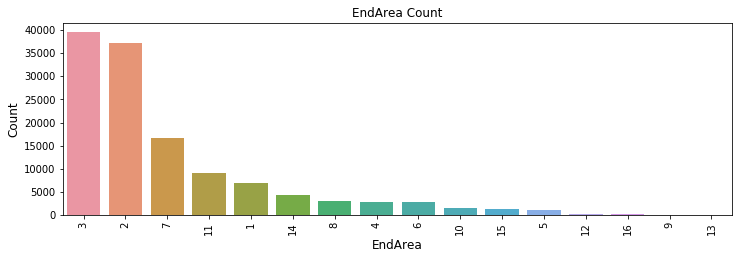

In [32]:
EndArea= datanew['EndArea'].value_counts()
print("EndArea count " + str(len(EndArea)))
print(EndArea)
plt.figure(figsize=(12,12))
plt.subplot(311)
sns.barplot(EndArea.index, EndArea.values, order = EndArea.index)
plt.ylabel('Count', fontsize=12)
plt.xlabel('EndArea', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("EndArea Count", fontsize=12)
plt.show()

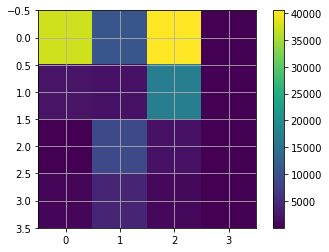

In [33]:
#StartArea distribution
from matplotlib import pyplot as plt
hist, xedges, yedges = np.histogram2d(datanew['StartLongitude'],datanew['StartLatitude'],bins=4,range=[[-85.769000, -85.694000],[38.203000, 38.290000]])
X,Y = np.meshgrid(xedges,yedges)
plt.imshow(hist)
plt.grid(True)
plt.colorbar()
plt.show()

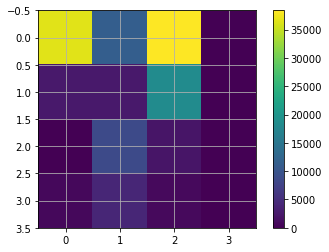

In [34]:
#EndArea distribution
hist1, xedges1, yedges1 = np.histogram2d(datanew['EndLongitude'],datanew['EndLatitude'],bins=4,range=[[-85.769000, -85.694000],[38.203000, 38.290000]])
X,Y = np.meshgrid(xedges1,yedges1)
plt.imshow(hist1)
plt.grid(True)
plt.colorbar()
plt.show()

In [35]:
AreaFlowOut_In=(StartArea-EndArea)
AreaFlowOut_In

1    -1090
2     1912
3     1976
4     -482
5     -290
6     -591
7     -690
8     -697
9      -27
10    -192
11     299
12      44
13      -4
14      69
15    -186
16     -51
dtype: int64

In [36]:
AreaFlowOut_In_percentage=(StartArea-EndArea)/StartArea
AreaFlowOut_In_percentage

1    -0.185627
2     0.048782
3     0.047604
4    -0.202691
5    -0.338390
6    -0.263839
7    -0.043004
8    -0.303571
9    -0.391304
10   -0.152745
11    0.031910
12    0.130564
13   -0.400000
14    0.015429
15   -0.161318
16   -0.500000
dtype: float64

# Visualization

In [37]:
bikes = pd.read_csv("https://data.louisvilleky.gov/sites/default/files/DocklessTripOpenData_1.csv")
bikes['count']=1
bikes.head()

TripID   StartDate StartTime     EndDate EndTime  \
0  00017244-16f8-0be0-5a68-3e860236  2018-10-23     17:45  2018-10-23   17:45   
1  000391b9-1d9c-5473-f20e-b58b3138  2019-01-28     17:45  2019-01-28   18:15   
2  000401e5-e298-4b7c-2434-8748939b  2018-12-21     14:30  2018-12-21   14:45   
3  00041db3-81c6-7f93-9a15-c0e9d767  2019-02-10     10:30  2019-02-10   10:30   
4  0005168d-e4d3-f07d-13b9-6dd3587c  2018-10-01     20:15  2018-10-01   20:45   

   TripDuration  TripDistance  StartLatitude  StartLongitude  EndLatitude  \
0           4.0          0.31         38.257         -85.759       38.254   
1          30.0          2.55         38.258         -85.756       38.254   
2           6.0          0.31         38.253         -85.758       38.253   
3           1.0          0.01         38.257         -85.762       38.257   
4          40.0          5.93         38.252         -85.757       38.252   

   EndLongitude  DayOfWeek  HourNum  count  
0       -85.758          3       17      1  
1       -85.753          2       17      1  
2       -85.759          6       14      1  
3       -85.763          1       10      1  
4       -85.757          2       20      1

In [38]:
print(np.min(bikes['StartLatitude']),np.min(bikes['StartLongitude']))
print(np.max(bikes['StartLatitude']),np.max(bikes['StartLongitude']))
print(np.min(bikes['EndLatitude']),np.min(bikes['EndLongitude']))
print(np.max(bikes['EndLatitude']),np.max(bikes['EndLongitude']))

38.089 -85.90299999999999
38.34 -85.486
-85.757 -122.415
48.864 6.832999999999999


In [39]:
#KT = x_range,y_range= ((-122.415,-85.486),(-85.757,48.864))
KT = x_range,y_range= ((-85.8,-85.66),(38.15,38.29))
plot_width = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan, wheel_zoom, reset', plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
              x_range=x_range, y_range=y_range, outline_line_color=None,
              min_border=0, min_border_left=0, min_border_right=0,
              min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

options = dict(line_color=None, fill_color='blue', size=5)


In [40]:
samples = bikes.sample(n=40000)
p = base_plot()

p.circle(x=samples['StartLongitude'], y=samples['StartLatitude'], **options)
show(p)

In [41]:
!pip install datashader
import datashader as ds
from datashader import transfer_functions as tr_fns
from datashader.colors import Greys9
Greys9_r = list(reversed(Greys9))[:2]

xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.3 which is incompatible.
xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.23.0 which is incompatible.
You are using pip version 10.0.1, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(bikes, 'StartLongitude', 'StartLatitude', ds.count('count'))
    img = tr_fns.shade(agg, cmap=Hot, how='eq_hist')
    return tr_fns.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(*KT), "KT_hot")
InteractiveImage(p, create_image)

In [43]:

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

def create_image(x_range, y_range, w=plot_width, h=plot_height):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(bikes, 'EndLongitude', 'EndLatitude', ds.count('count'))
    img = tr_fns.shade(agg, cmap=Hot, how='eq_hist')
    return tr_fns.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(*KT), "KT_hot")
InteractiveImage(p, create_image)

# Transition Matrix

In [44]:
data = pd.read_csv('0-23_outputhour.csv', header = 0)
data[(data['HourNum'] == 0) & (data['StartArea'] == 1) & (data['EndArea'] == 1)]['Number'].sum()

12

In [45]:
## Function to get transition matrix for each hour
## hour goes from 0 to 23 
def get_transition_matrix(hour):
    matrix = np.zeros((16, 16))
    for i in range(1,17):
        denom = data[(data['HourNum'] == hour) & (data['StartArea'] == i)]['Number'].sum()
        for j in range(1,17):
            num = data[(data['HourNum'] == hour) & (data['StartArea'] == i) & (data['EndArea'] == j)]['Number'].sum()

            matrix[i-1,j-1] = num/denom
    return matrix

In [46]:
get_transition_matrix(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


array([[0.52173913, 0.43478261, 0.04347826, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05785124, 0.90909091, 0.01652893, 0.        , 0.00826446,
        0.        , 0.00826446, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.14925373, 0.70149254, 0.01492537, 0.        ,
        0.02985075, 0.07462687, 0.        , 0.        , 0.        ,
        0.02985075, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.5       , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 

# Simulate Daily Movement and Demand

## Get Average Daily Demand Per Zone

In [47]:
def get_demand(hour):
    demand = np.zeros(16)
    for i in range(1,17):
        rides = data[(data['HourNum'] == hour) & (data['StartArea'] == i)]['Number'].sum()
        demand[i-1] = rides/203 
    return demand

In [48]:
def get_arrival(hour):
    arrival = np.zeros(16)
    for i in range(1,17):
        rides = data[(data['HourNum'] == hour) & (data['EndArea'] == i)]['Number'].sum()
        arrival[i-1] = rides/203 
    return arrival

In [49]:
def zone_demand_day(zone):
    demands = np.zeros(24)
    for i in range(24):
        demand = get_demand(i)
        demands[i] = demand[zone-1]
    return demands

In [50]:
zone_demand_day(3)

array([ 0.33004926,  0.25615764,  0.20689655,  0.37931034,  0.93596059,
        1.8226601 ,  2.7635468 ,  5.13793103,  8.28571429, 10.20197044,
       11.78817734, 15.8226601 , 19.29064039, 19.2364532 , 18.69458128,
       19.18719212, 17.3546798 , 16.91625616, 13.07389163, 10.54679803,
        8.30541872,  2.28078818,  0.95566502,  0.7044335 ])

In [51]:
def zone_arrival_day(zone):
    arrivals = np.zeros(24)
    for i in range(24):
        arrival= get_arrival(i)
        arrivals[i] = arrival[zone-1]
    return arrivals

Text(0.5,1,'Rides Starting in Zone 3 By Hour')

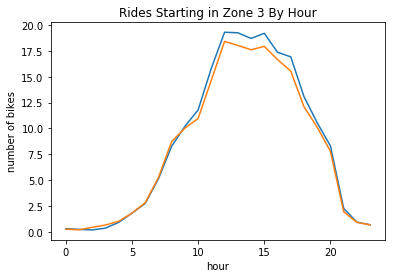

In [52]:
hour = np.arange(24)
plt.plot(hour,zone_demand_day(3))
plt.plot(hour,zone_arrival_day(3))
plt.xlabel("hour")
plt.ylabel("number of bikes")
plt.title("Rides Starting in Zone 3 By Hour")

In [53]:
hourly_zone_demand=[zone_demand_day(i) for i in range(1,17)]

In [54]:
def function(initial_setup,lost_demand):
    print("start setup", initial_setup)
    demand_captured=0
    demand_lost=0
    bikes_not_used=0
    hourly_zone_demand=[zone_demand_day(i) for i in range(1,17)]
    hourly_zone_arrival=[zone_arrival_day(i) for i in range(1,17)]
    for i in range(24):  
        hourly_transition_matrix=get_transition_matrix(i)
        for j in range(16):
            hour_zone_demand=hourly_zone_demand[j][i]* (100/(100-lost_demand[i]))
            hour_zone_demand_sim=round(np.random.poisson(hour_zone_demand))
            num_bikes_in_j=initial_setup[j]
            zone_arrival_day_sim=int(round(np.random.poisson(hourly_zone_arrival[j][i]))/2)
            if num_bikes_in_j>=hour_zone_demand_sim:
                demand_captured=demand_captured+hour_zone_demand_sim
                bikes_not_used=bikes_not_used+(num_bikes_in_j-hour_zone_demand_sim)
            else:
                demand_captured=demand_captured+min((num_bikes_in_j+zone_arrival_day_sim),hour_zone_demand_sim)
                demand_lost=demand_lost+max((hour_zone_demand_sim-(num_bikes_in_j+zone_arrival_day_sim)),0)
            if (num_bikes_in_j>0):
                num_bikes_moving=min(hour_zone_demand_sim, num_bikes_in_j)
                for k in range(num_bikes_moving):
                    zone_j_probs=np.cumsum(np.array(hourly_transition_matrix[j]))
                    u=np.random.rand()
                    x=0
                    while (u>zone_j_probs[x]):
                        x=x+1                    
                    if x!=j:
                        initial_setup[j]-=1
                        initial_setup[x]+=1
        print("after hour",i, initial_setup)
    print("demand captured", demand_captured)
    print("demand lost", demand_lost) 
    print("bikes not used", bikes_not_used)
    return demand_captured,demand_lost, bikes_not_used

In [55]:
#this version shows the zone breakdown of demand captured and lost
def function(initial_setup,lost_demand):
    #print("start setup", initial_setup)
    demand_captured=0
    demand_lost=0
    hourly_zone_demand=[zone_demand_day(i) for i in range(1,17)]
    hourly_zone_arrival=[zone_arrival_day(i) for i in range(1,17)]
    demand_captured_total =  np.zeros(16)
    demand_lost_total = np.zeros(16)
    for i in range(24):  
        hourly_transition_matrix=get_transition_matrix(i)
        demand_lost_zone = np.array([])
        demand_captured_zone = np.array([])
        demand_zone = np.array([])
        for j in range(16):
            zone_demand=hourly_zone_demand[j][i]* (100/(100-lost_demand[i]))
            hour_zone_demand_sim=np.random.poisson(zone_demand)
            demand_zone = np.append(demand_zone,hour_zone_demand_sim)
            num_bikes_in_j=initial_setup[j]
            zone_arrival_day_sim=np.random.poisson(hourly_zone_arrival[j][i])
            if num_bikes_in_j>=hour_zone_demand_sim:
                #print("enough scooters")
                demand_captured=demand_captured+hour_zone_demand_sim
                demand_captured_zone = np.append(demand_captured_zone, hour_zone_demand_sim)
                demand_captured_total[j] = demand_captured_total[j]+ hour_zone_demand_sim
                demand_lost_zone = np.append(demand_lost_zone, 0)
            #elif num_bikes_in_j+zone_arrival_day_sim<hour_zone_demand_sim:
            else:
                #print("not enough scooters")
                demand_captured=demand_captured+min((num_bikes_in_j+zone_arrival_day_sim),hour_zone_demand_sim)
                demand_captured_zone = np.append(demand_captured_zone, min((num_bikes_in_j+zone_arrival_day_sim),hour_zone_demand_sim))
                demand_captured_total[j] = demand_captured_total[j]+ min((num_bikes_in_j+zone_arrival_day_sim),hour_zone_demand_sim)
                demand_lost=demand_lost+max((hour_zone_demand_sim-(num_bikes_in_j)),0)
                demand_lost_zone = np.append(demand_lost_zone, max((hour_zone_demand_sim-(num_bikes_in_j)),0))
                demand_lost_total[j] = demand_lost_total[j]+ max((hour_zone_demand_sim-(num_bikes_in_j)),0)
            if (num_bikes_in_j>0):
                num_bikes_moving=min(hour_zone_demand_sim, num_bikes_in_j)
                for k in range(num_bikes_moving):
                    #from zone j to anywhere else
                    zone_j_probs=np.cumsum(np.array(hourly_transition_matrix[j]))
                    #print(zone_j_probs)
                    u=np.random.rand()
                    #print(zone_j_probs[0])
                    x=0
                    while (u>zone_j_probs[x]):
                        x=x+1                    
                    if x!=j:
                        initial_setup[j]-=1
                        initial_setup[x]+=1
        

       # print("after hour",i, initial_setup)
        
       # print("-------------------------------------------------------------------------------")
    #print("Demand Captured for each zone", demand_captured_total)
    #print("Demand Lost for each zone", demand_lost_total)
    #print("demand captured", demand_captured)
    #print("demand lost", demand_lost)  
    return demand_captured,demand_lost
                
#at the start of every hour, are those number of scooters in each zone proportional to the 
#amount of net flow of scooters from that zone in the next hour

In [56]:
initial_setup=[10,30,40,5,1,5,20,5,1,3,15,1,1,10,1,1]
lost_demand=[1,2,2,2,3,3,3,4,5,6,7,8,7,6,5,6,7,4,3,2,2,2,2,1]

In [57]:
function(initial_setup, lost_demand)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


(635, 2)

In [58]:
#even setup
x1=np.array([function([16,16,16,16,16,16,16,16,14,16,16,16,14,16,16,14],lost_demand) for i in range(20)])
x1_demand_captured=np.array([x1[k][0] for k in range(20)])
x1_demand_lost=np.array([x1[l][1] for l in range(20)])
x1_demand_captured_mean=np.mean(x1_demand_captured)
x1_demand_lost_mean=np.mean(x1_demand_lost)
print("average demand captured", x1_demand_captured_mean)
print("average demand lost", x1_demand_lost_mean)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


average demand captured 667.6
average demand lost 80.6


In [59]:
#proportional to demand setup
x1=np.array([function([12,77,81,5,2,4,32,5,0,2,18,1,0,9,2,0],lost_demand) for i in range(20)])
x1_demand_captured=np.array([x1[k][0] for k in range(20)])
x1_demand_lost=np.array([x1[l][1] for l in range(20)])
x1_demand_captured_mean=np.mean(x1_demand_captured)
x1_demand_lost_mean=np.mean(x1_demand_lost)
print("average demand captured", x1_demand_captured_mean)
print("average demand lost", x1_demand_lost_mean)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


average demand captured 657.05
average demand lost 4.0


In [60]:
#proportional to morning demand setup (6-10AM)
x1=np.array([function([15,109,71,3,2,4,26,2,0,2,10,1,0,4,0,0],lost_demand) for i in range(20)])
x1_demand_captured=np.array([x1[k][0] for k in range(20)])
x1_demand_lost=np.array([x1[l][1] for l in range(20)])
x1_demand_captured_mean=np.mean(x1_demand_captured)
x1_demand_lost_mean=np.mean(x1_demand_lost)
print("average demand captured", x1_demand_captured_mean)
print("average demand lost", x1_demand_lost_mean)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


average demand captured 643.65
average demand lost 11.35


In [61]:
function([12,77,81,5,2,4,32,5,0,2,18,1,0,9,2,0],lost_demand)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


(653, 8)

In [62]:
function([12,73,93,0,0,0,40,0,0,0,20,0,0,12,0,0],lost_demand)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


(628, 8)